## Statistical Linear Regression Models
- Least squares is an estimation tool, how do we do inference?
- Consider developing a probabilistic mode lfor linear regression  
$Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i$  
- Here the $\varepsilon_i$ are suumed iid $\mathcal{N}(0, \sigma^2)$
- Note, $E\left[ Y_{i} | X_{i} = x_{i} \right] = \mu_{i} = \beta_0 + \beta_1 x_{i}$
- Note, $\text{Var}(Y_{i} | X_{i} = x_{i}) = \sigma^2$

### Linear Regression for Prediction

In [9]:
library(UsingR)
data(diamond)
library(ggplot2)

NULL

`geom_smooth()` using formula 'y ~ x'



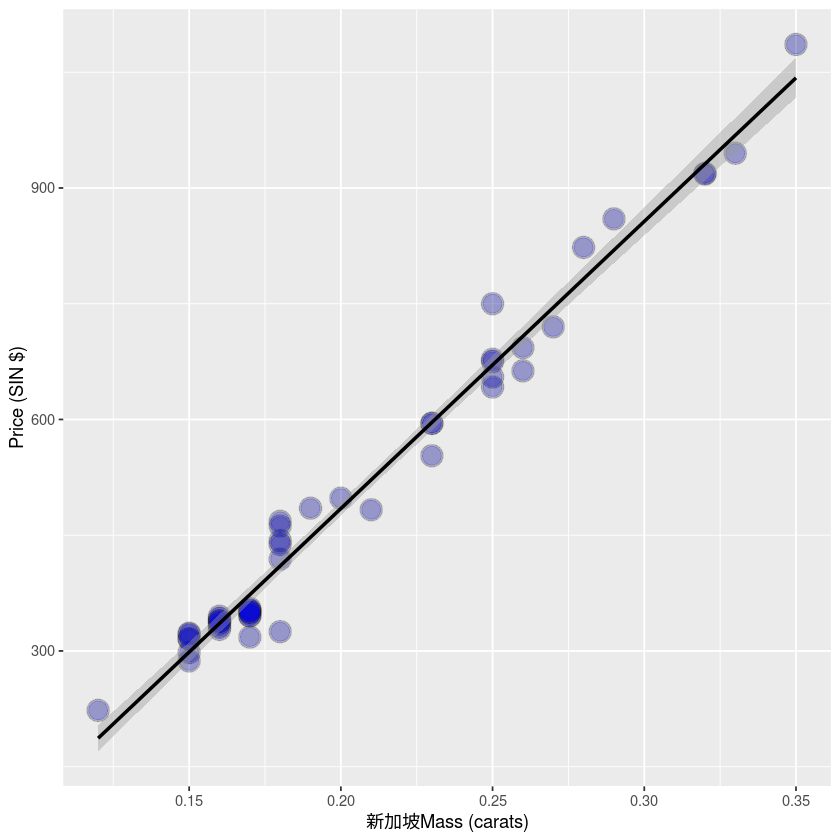

In [15]:
g <- NULL
g <- ggplot(data = diamond, aes(x = carat, y = price))
g <- g + xlab("Mass (carats)")
g <- g + ylab("Price (SIN $)")
g <- g + geom_point(size = 6, color="black", alpha = 0.2)
g <- g + geom_point(size = 5, color="blue", alpha = 0.2)
g <- g + geom_smooth(method='lm', color = "black")
g

In [16]:
fit <- lm(price ~ carat, data = diamond)
summary(fit)


Call:
lm(formula = price ~ carat, data = diamond)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.159 -21.448  -0.869  18.972  79.370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -259.63      17.32  -14.99   <2e-16 ***
carat        3721.02      81.79   45.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.84 on 46 degrees of freedom
Multiple R-squared:  0.9783,	Adjusted R-squared:  0.9778 
F-statistic:  2070 on 1 and 46 DF,  p-value: < 2.2e-16


In [20]:
fit$coefficients[1] #intercept
fit$coefficients[2] #slope

(Intercept) 
  -259.6259

carat 
3721.025

In [25]:
catat_demean <- diamond$carat - mean(diamond$carat)
fit2 <- lm(price ~ catat_demean, data = diamond)
fit2$coefficients

(Intercept) catat_demean 
    500.0833    3721.0249

In [26]:
mean(diamond$carat)

[1] 0.2041667

So that the average sized diamond (0.20 carat) is worth 500.1 Sing $

In [28]:
carat_mlt10 <- diamond$carat * 10
fit3 <- lm(price ~ carat_mlt10, data = diamond)
fit3$coefficients

(Intercept) carat_mlt10 
  -259.6259    372.1025

In [33]:
newx <- c(0.16, 0.27, 0.34)
fit$coefficients[1] + fit$coefficients[2] * newx
predict1 <- predict(fit, newdata = data.frame(carat = newx))
predict1

[1]  335.7381  745.0508 1005.5225

1         2         3 
 335.7381  745.0508 1005.5225

In [36]:
# it predicts at the observed data, and gives you the $hat{y}$ values
predict(fit)

1         2         3         4         5         6         7         8 
 372.9483  335.7381  372.9483  410.1586  670.6303  335.7381  298.5278  447.3688 
        9        10        11        12        13        14        15        16 
 521.7893  298.5278  410.1586  782.2611  335.7381  484.5791  596.2098  819.4713 
       17        18        19        20        21        22        23        24 
 186.8971  707.8406  670.6303  745.0508  410.1586  335.7381  372.9483  335.7381 
       25        26        27        28        29        30        31        32 
 372.9483  410.1586  372.9483  410.1586  372.9483  298.5278  372.9483  931.1020 
       33        34        35        36        37        38        39        40 
 931.1020  298.5278  335.7381  335.7381  596.2098  596.2098  372.9483  968.3123 
       41        42        43        44        45        46        47        48 
 670.6303 1042.7328  410.1586  670.6303  670.6303  298.5278  707.8406  298.5278

## Residuals

In [38]:
residuals(fit)

1           2           3           4           5           6 
-17.9483176  -7.7380691 -22.9483176 -85.1585661 -28.6303057   6.2619309 
          7           8           9          10          11          12 
 23.4721795  37.6311854 -38.7893116  24.4721795  51.8414339  40.7389488 
         13          14          15          16          17          18 
  0.2619309  13.4209369  -1.2098087  40.5287002  36.1029250 -44.8405542 
         19          20          21          22          23          24 
 79.3696943 -25.0508027  57.8414339   9.2619309 -20.9483176  -3.7380691 
         25          26          27          28          29          30 
-19.9483176  27.8414339 -54.9483176   8.8414339 -26.9483176  16.4721795 
         31          32          33          34          35          36 
-22.9483176 -13.1020453 -12.1020453  -0.5278205   3.2619309   2.2619309 
         37          38          39          40          41          42 
 -1.2098087 -43.2098087 -27.9483176 -23.3122938 -15.6303057  43.2672091 
         43          44          45          46          47          48 
 32.8414339   7.3696943   4.3696943 -11.5278205 -14.8405542  17.4721795

In [39]:
fit$residuals

1           2           3           4           5           6 
-17.9483176  -7.7380691 -22.9483176 -85.1585661 -28.6303057   6.2619309 
          7           8           9          10          11          12 
 23.4721795  37.6311854 -38.7893116  24.4721795  51.8414339  40.7389488 
         13          14          15          16          17          18 
  0.2619309  13.4209369  -1.2098087  40.5287002  36.1029250 -44.8405542 
         19          20          21          22          23          24 
 79.3696943 -25.0508027  57.8414339   9.2619309 -20.9483176  -3.7380691 
         25          26          27          28          29          30 
-19.9483176  27.8414339 -54.9483176   8.8414339 -26.9483176  16.4721795 
         31          32          33          34          35          36 
-22.9483176 -13.1020453 -12.1020453  -0.5278205   3.2619309   2.2619309 
         37          38          39          40          41          42 
 -1.2098087 -43.2098087 -27.9483176 -23.3122938 -15.6303057  43.2672091 
         43          44          45          46          47          48 
 32.8414339   7.3696943   4.3696943 -11.5278205 -14.8405542  17.4721795

## Residuals

`geom_smooth()` using formula 'y ~ x'



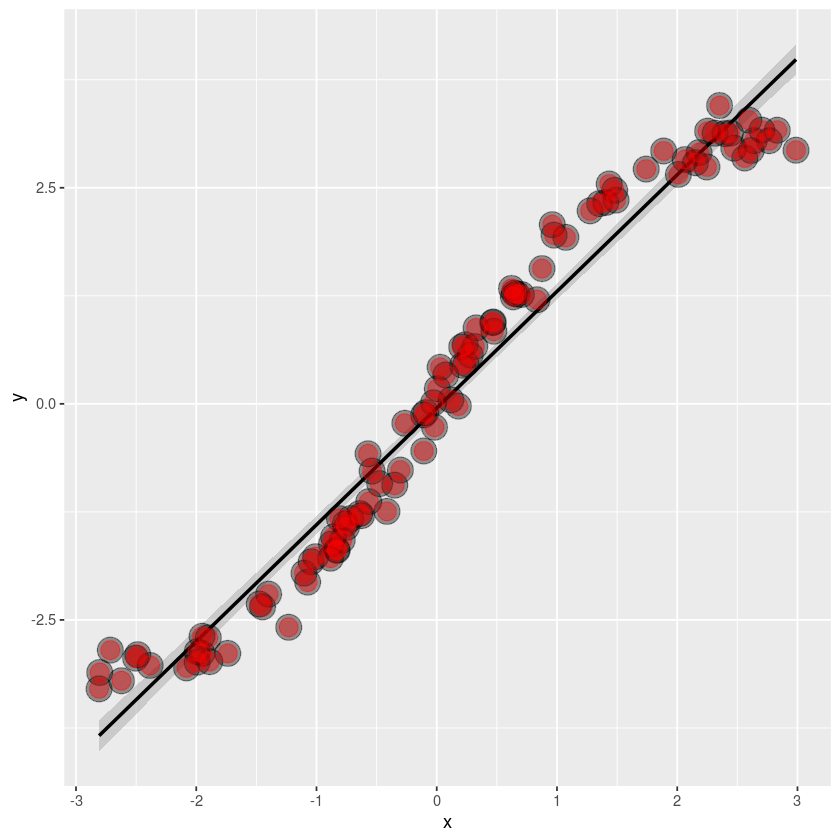

In [45]:
## Non-linear data
x = runif(100, -3, 3)
y <- x + sin(x) + rnorm(100, sd = 0.2)
library(ggplot2)
g <- NULL
g <- ggplot(data.frame(x = x, y = y), aes(x = x, y = y))
g <- g + geom_smooth(method="lm", color="black")
g <- g + geom_point(size = 7, color = 'black', alpha = 0.4)
g <- g + geom_point(size = 5, color = 'red', alpha = 0.4)
g

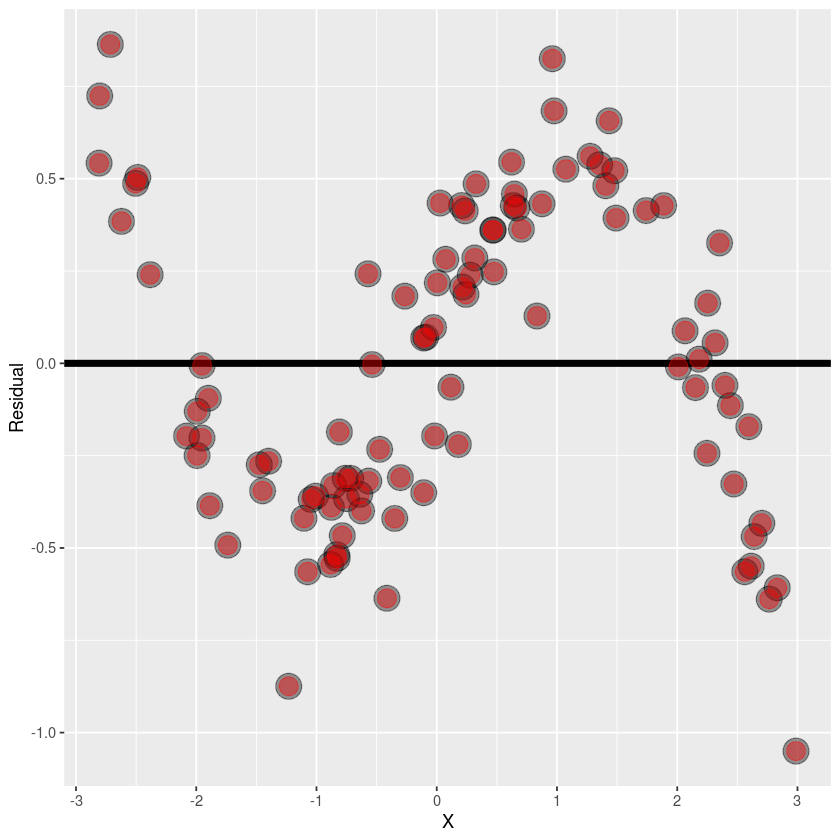

In [51]:
# Residual plot
g <- NULL
g <- ggplot(data.frame(x = x, y = residuals(lm(y~x))), aes(x = x, y = y))
g <- g + geom_hline(yintercept = 0, size = 2)
g <- g + geom_point(size = 7, color = 'black', alpha = 0.4)
g <- g + geom_point(size = 5, color = 'red', alpha = 0.4)
g <- g + xlab("X") + ylab("Residual")
g

## Residual variation
$\hat{\sigma}^{2} = \frac{1}{n-2} \sum_{i=1}^{n} e_{i}^{2}$

In [53]:
y <- diamond$price
x <- diamond$carat
n <- length(y)
fit <- lm(y ~ x)
fit_sum <- summary(fit)

In [54]:
fit_sum$sigma

[1] 31.84052

In [57]:
# equivalent to
sqrt((1/(n-2))*sum(fit$residuals^2))

[1] 31.84052

In [58]:
# also equivalent to
fit_sum


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.159 -21.448  -0.869  18.972  79.370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -259.63      17.32  -14.99   <2e-16 ***
x            3721.02      81.79   45.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.84 on 46 degrees of freedom
Multiple R-squared:  0.9783,	Adjusted R-squared:  0.9778 
F-statistic:  2070 on 1 and 46 DF,  p-value: < 2.2e-16


### R squared
- **Definition**: the percentage of the total variability that is explained by the linear relationship with the prediction

$R^2 = \frac{\sum_{i=1}^{n} \left( \hat{Y}_{i} - \bar{Y} \right)^2}{\sum_{i=1}^{n} \left( Y_{i} - \bar{Y} \right)^2}$

## Inference in regression

In [59]:
?cor

cor {stats},R Documentation
x,"a numeric vector, matrix or data frame."
y,"NULL (default) or a vector, matrix or data frame with compatible dimensions to x. The default is equivalent to y = x (but more efficient)."
na.rm,logical. Should missing values be removed?
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"": can be abbreviated."
V,"symmetric numeric matrix, usually positive definite such as a covariance matrix."


In [60]:
x <- c(0.61, 0.93, 0.83, 0.35, 0.54, 0.16, 0.91, 0.62, 0.62)
y <- c(0.67, 0.84, 0.6, 0.18, 0.85, 0.47, 1.1, 0.65, 0.36)
fit <- lm(y~x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27636 -0.18807  0.01364  0.16595  0.27143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.1885     0.2061   0.914    0.391  
x             0.7224     0.3107   2.325    0.053 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.223 on 7 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.3552 
F-statistic: 5.408 on 1 and 7 DF,  p-value: 0.05296


In [69]:
data(mtcars)
#names(mtcars)
fit <- lm(mpg ~ wt, data = mtcars)
fit_sum <- summary(fit)
wt_avg = mean(mtcars$wt)
n = length(mtcars$mpg)

In [90]:
mean(mtcars$mpg)

[1] 20.09062

In [79]:
fit_sum$sigma

[1] 3.045882

In [107]:
(fit_sum$coefficients[1,1] + fit_sum$coefficients[2,1] * 3) + c(-1,1) * qt(0.975, 30) * fit_sum$sigma/sqrt(n)

[1] 20.15207 22.35135

In [110]:
predict(fit, newdata = data.frame(wt=3), interval = ("prediction"))

,fit,lwr,upr
1,21.25171,14.92987,27.57355


In [106]:
y_hat <- fit_sum$coefficients[1,1] + fit_sum$coefficients[2,1] * 3
y_hat + c(-1,1) * qt(0.975, df = fit$df) * fit_sum$sigma / sqrt(n)

[1] 20.15207 22.35135

In [101]:
help(mtcars)

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [102]:
predict(fit, newdata = data.frame(wt = 3000), interval = "confidence")

,fit,lwr,upr
1,-15996.13,-19417.97,-12574.29
